# Python imports

In [1]:
# Show plots as part of the notebook (this is a Jupyter-specific operation)
%matplotlib inline
import time
import matplotlib.pyplot as plt
import requests
import xmltodict
# Standard library packages
import os

# Import Pandas and Seaborn
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
from Bio.Blast.Applications import NcbiblastxCommandline
from Bio.Blast.Applications import NcbiblastnCommandline

In [9]:
from datetime import datetime
from pytz import timezone

now_time = datetime.now(timezone('America/Chicago'))
print(now_time.strftime('%I:%M:%S %p'))

10:23:50 PM


In [10]:
help(NcbiblastnCommandline)

Help on class NcbiblastnCommandline in module Bio.Blast.Applications:

class NcbiblastnCommandline(_NcbiblastMain2SeqCommandline)
 |  NcbiblastnCommandline(cmd='blastn', **kwargs)
 |  
 |  Wrapper for the NCBI BLAST+ program blastn (for nucleotides).
 |  
 |  With the release of BLAST+ (BLAST rewritten in C++ instead of C), the NCBI
 |  replaced the old blastall tool with separate tools for each of the searches.
 |  This wrapper therefore replaces BlastallCommandline with option -p blastn.
 |  
 |  For example, to run a search against the "nt" nucleotide database using the
 |  FASTA nucleotide file "m_code.fasta" as the query, with an expectation value
 |  cut off of 0.001, saving the output to a file in XML format:
 |  
 |  >>> from Bio.Blast.Applications import NcbiblastnCommandline
 |  >>> cline = NcbiblastnCommandline(query="m_cold.fasta", db="nt", strand="plus",
 |  ...                               evalue=0.001, out="m_cold.xml", outfmt=5)
 |  >>> cline
 |  NcbiblastnCommandline(

In [ ]:
#blastn -task blastn -query example/unknown.fa -db db/bacteria/bacteria_nucl -out example/blastn_bacteria.out

In [ ]:
ju

# Running and analyzing a local BLASTN search for July142020-ALL-R1.fasta

In [11]:
cmd_blastn = NcbiblastnCommandline(query='July142020-ALL-R1.fasta',
                      out='July142020-ALL-R1_blastn.tab',
                      outfmt=6,
                      db='db_ref_ALL_cat/db_ref_16s_ALL_cat',
                      num_threads = 64)

In [12]:
# Get a working command-line
print(cmd_blastn)

blastn -out July142020-ALL-R1_blastn.tab -outfmt 6 -query July142020-ALL-R1.fasta -db db_ref_ALL_cat/db_ref_16s_ALL_cat -num_threads 64


In [13]:
%%time
cmd_blastn()

CPU times: user 833 ms, sys: 595 ms, total: 1.43 s
Wall time: 4h 31min 57s


('', '')

In [ ]:
#https://widdowquinn.github.io/2018-03-06-ibioic/02-sequence_databases/03-programming_for_blast.html#runblastx
# Run BLASTX, and catch STDOUT/STDERR
# !! Do not execute cell if skipping computation !!
#stdout, stderr = cmd_blastn()

# Check STDOUT, STDERR
#print("STDOUT: %s" % stdout)
#print("STDERR: %s" % stderr)

# EDA for Results: "July142020-ALL-R1_blastn.tab" 

In [2]:
# !! If you are skipping computational steps, uncomment the line below !!
#blastout = os.path.join('prepped', 'kitasatospora', 'AMK19_00175_blastx_kitasatospora.tab')  # BLAST output

# Read BLASTX output
results = pd.read_csv("July142020-ALL-R1_blastn.tab", sep="\t", header=None)

In [3]:
# Inspect results table
results.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.660000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,7.930000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.320000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0


In [4]:
# Define column headers
headers = ['query', 'subject',
           'pc_identity', 'aln_length', 'mismatches', 'gaps_opened',
           'query_start', 'query_end', 'subject_start', 'subject_end',
           'e_value', 'bitscore']

# Assign headers
results.columns = headers

# Inspect modified table
results.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.660000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,7.930000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.320000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0


In [6]:
# Show a summary of the results table data
results.describe()

,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
count,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07,1.616299e+07
mean,9.075709e+01,1.068685e+02,9.884636e+00,9.357148e-01,1.435241e+01,1.196718e+02,8.272844e+04,8.272762e+04,6.450271e-08,1.361776e+02
std,5.303990e+00,3.871796e+01,7.051898e+00,1.634939e+00,2.394496e+01,3.547320e+01,3.726904e+05,3.726905e+05,3.880268e-05,4.922024e+01
min,7.337700e+01,2.400000e+01,0.000000e+00,0.000000e+00,1.000000e+00,2.500000e+01,1.000000e+00,1.000000e+00,1.590000e-74,3.810000e+01
25%,8.699200e+01,7.400000e+01,4.000000e+00,0.000000e+00,1.000000e+00,9.500000e+01,6.870000e+02,6.840000e+02,3.590000e-41,9.900000e+01
50%,9.090900e+01,1.130000e+02,9.000000e+00,0.000000e+00,2.000000e+00,1.350000e+02,5.993000e+03,5.982000e+03,4.710000e-30,1.320000e+02
75%,9.473700e+01,1.450000e+02,1.500000e+01,1.000000e+00,1.600000e+01,1.510000e+02,8.506400e+04,8.506800e+04,4.770000e-20,1.690000e+02
max,1.000000e+02,1.790000e+02,4.000000e+01,2.000000e+01,1.250000e+02,1.510000e+02,6.574866e+06,6.574884e+06,1.100000e-01,2.790000e+02


In [7]:
# Show all subject matches
print(results['subject'])

0            KJ410683.1
1            KJ410683.1
2           NC_031144.1
3           NC_031144.1
4            KX284709.1
               ...     
16162983       M26360.1
16162984       M26358.1
16162985     AY102613.1
16162986     AY690210.1
16162987     HM973758.1
Name: subject, Length: 16162988, dtype: object


In [8]:
results.shape

(16162988, 12)

In [5]:
results_target = results.loc[results['e_value'] < 0.000001]

In [12]:
results_target

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.660000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,7.930000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.320000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16162983,A00842:193:HMWFWDRXY:2:2278:11496:36933,M26360.1,83.333,150,23,2,3,151,1062,1210,1.010000e-31,137.0
16162984,A00842:193:HMWFWDRXY:2:2278:11496:36933,M26358.1,83.333,150,23,2,3,151,1062,1210,1.010000e-31,137.0
16162985,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY102613.1,87.603,121,12,2,3,123,1029,1146,1.010000e-31,137.0
16162986,A00842:193:HMWFWDRXY:2:2278:11496:36933,AY690210.1,92.391,92,7,0,60,151,1,92,4.710000e-30,132.0


In [10]:
results_target.shape

(15854892, 12)

In [11]:
results_target.to_csv('01_db_blastn_July142020_filtered_subj.csv', index=False)

In [6]:
df = pd.read_csv('01_db_blastn_July142020_filtered_subj.csv')

In [14]:
df.head()

,query,subject,pc_identity,aln_length,mismatches,gaps_opened,query_start,query_end,subject_start,subject_end,e_value,bitscore
0,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,90.580,138,9,4,5,140,65939,66074,1.660000e-44,180.0
1,A00842:193:HMWFWDRXY:1:2101:18322:1094,KJ410683.1,87.368,95,11,1,8,102,4262,4169,7.930000e-23,108.0
2,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0
3,A00842:193:HMWFWDRXY:1:2101:18322:1094,NC_031144.1,83.721,129,16,4,16,142,110876,110751,1.320000e-25,117.0
4,A00842:193:HMWFWDRXY:1:2101:18322:1094,KX284709.1,83.916,143,18,4,2,142,138599,138738,4.710000e-30,132.0


In [7]:
df['subject'].nunique()

9384

In [18]:
base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/{}"
db = "nuccore"

In [19]:
def get_taxon_name(tax_id):
    try:
        efetch = "efetch.fcgi?db={}&id={}&rettype=json".format(db, tax_id)
        efetch_response = requests.get(base_url.format(efetch))
        efetch_dict = xmltodict.parse(efetch_response.content)
        Definition = efetch_dict['GBSet']['GBSeq']['GBSeq_definition']
        Definition = Definition.split(',')
        Definition = Definition[0]
        time.sleep(0.5)
    except:
        Definition = tax_id
        pass
 
    return Definition

In [20]:
get_taxon_name("KT266789.1")

'Pyropia pulchra plastid'

In [21]:
def enrich_dataset(df):
    taxon_value = df['subject']
    ScientificName = get_taxon_name(taxon_value)
    df['taxon_name'] = ScientificName
    return df

In [34]:
df = df['subject'].value_counts()
df = pd.Series(df)
df.to_csv('02_July142020-ALL-R1_blastn.csv')

In [35]:
df = pd.read_csv('02_July142020-ALL-R1_blastn.csv')
df.columns.values[0] = "subject"
df.columns.values[1] = "count"

In [36]:
df.head()

,subject,count
0,JAGRRH010000013.1,74211
1,LR877147.1,44319
2,LR877155.1,36624
3,LR877169.1,31048
4,NC_011087.1,31009


In [37]:
df.shape

(9384, 2)

In [38]:
%%time
df = df.apply(enrich_dataset, axis=1)

CPU times: user 6min 36s, sys: 25.1 s, total: 7min 1s
Wall time: 2h 29min 40s


In [39]:
df.to_csv('03_July142020-ALL-R1_blastn-TaxaName.csv', index=False)

In [40]:
df = pd.read_csv('03_July142020-ALL-R1_blastn-TaxaName.csv')

In [51]:
df.shape

(9384, 3)

In [50]:
df.describe()

,count
count,9384.000000
mean,1689.566496
std,4147.520542
min,1.000000
25%,222.000000
50%,519.000000
75%,974.000000
max,74211.000000


In [45]:
df.head(50)

,subject,count,taxon_name
0,JAGRRH010000013.1,74211,Nitzschia inconspicua strain hildebrandi tig00...
1,LR877147.1,44319,Angomonas deanei strain Crithidia deanei Carva...
2,LR877155.1,36624,Angomonas deanei strain Crithidia deanei Carva...
3,LR877169.1,31048,Angomonas deanei strain Crithidia deanei Carva...
4,NC_011087.1,31009,Paulinella chromatophora chromatophore
5,NC_039737.1,29959,Paulinella micropora isolate NZ27 plastid
6,LC490351.1,29744,Paulinella micropora MYN1 chromatophore DNA
7,CP000815.1,29733,Paulinella chromatophora chromatophore
8,KY124271.1,29683,Paulinella micropora strain FK01 plastid
9,KX897545.1,29605,Paulinella micropora strain KR01 plastid


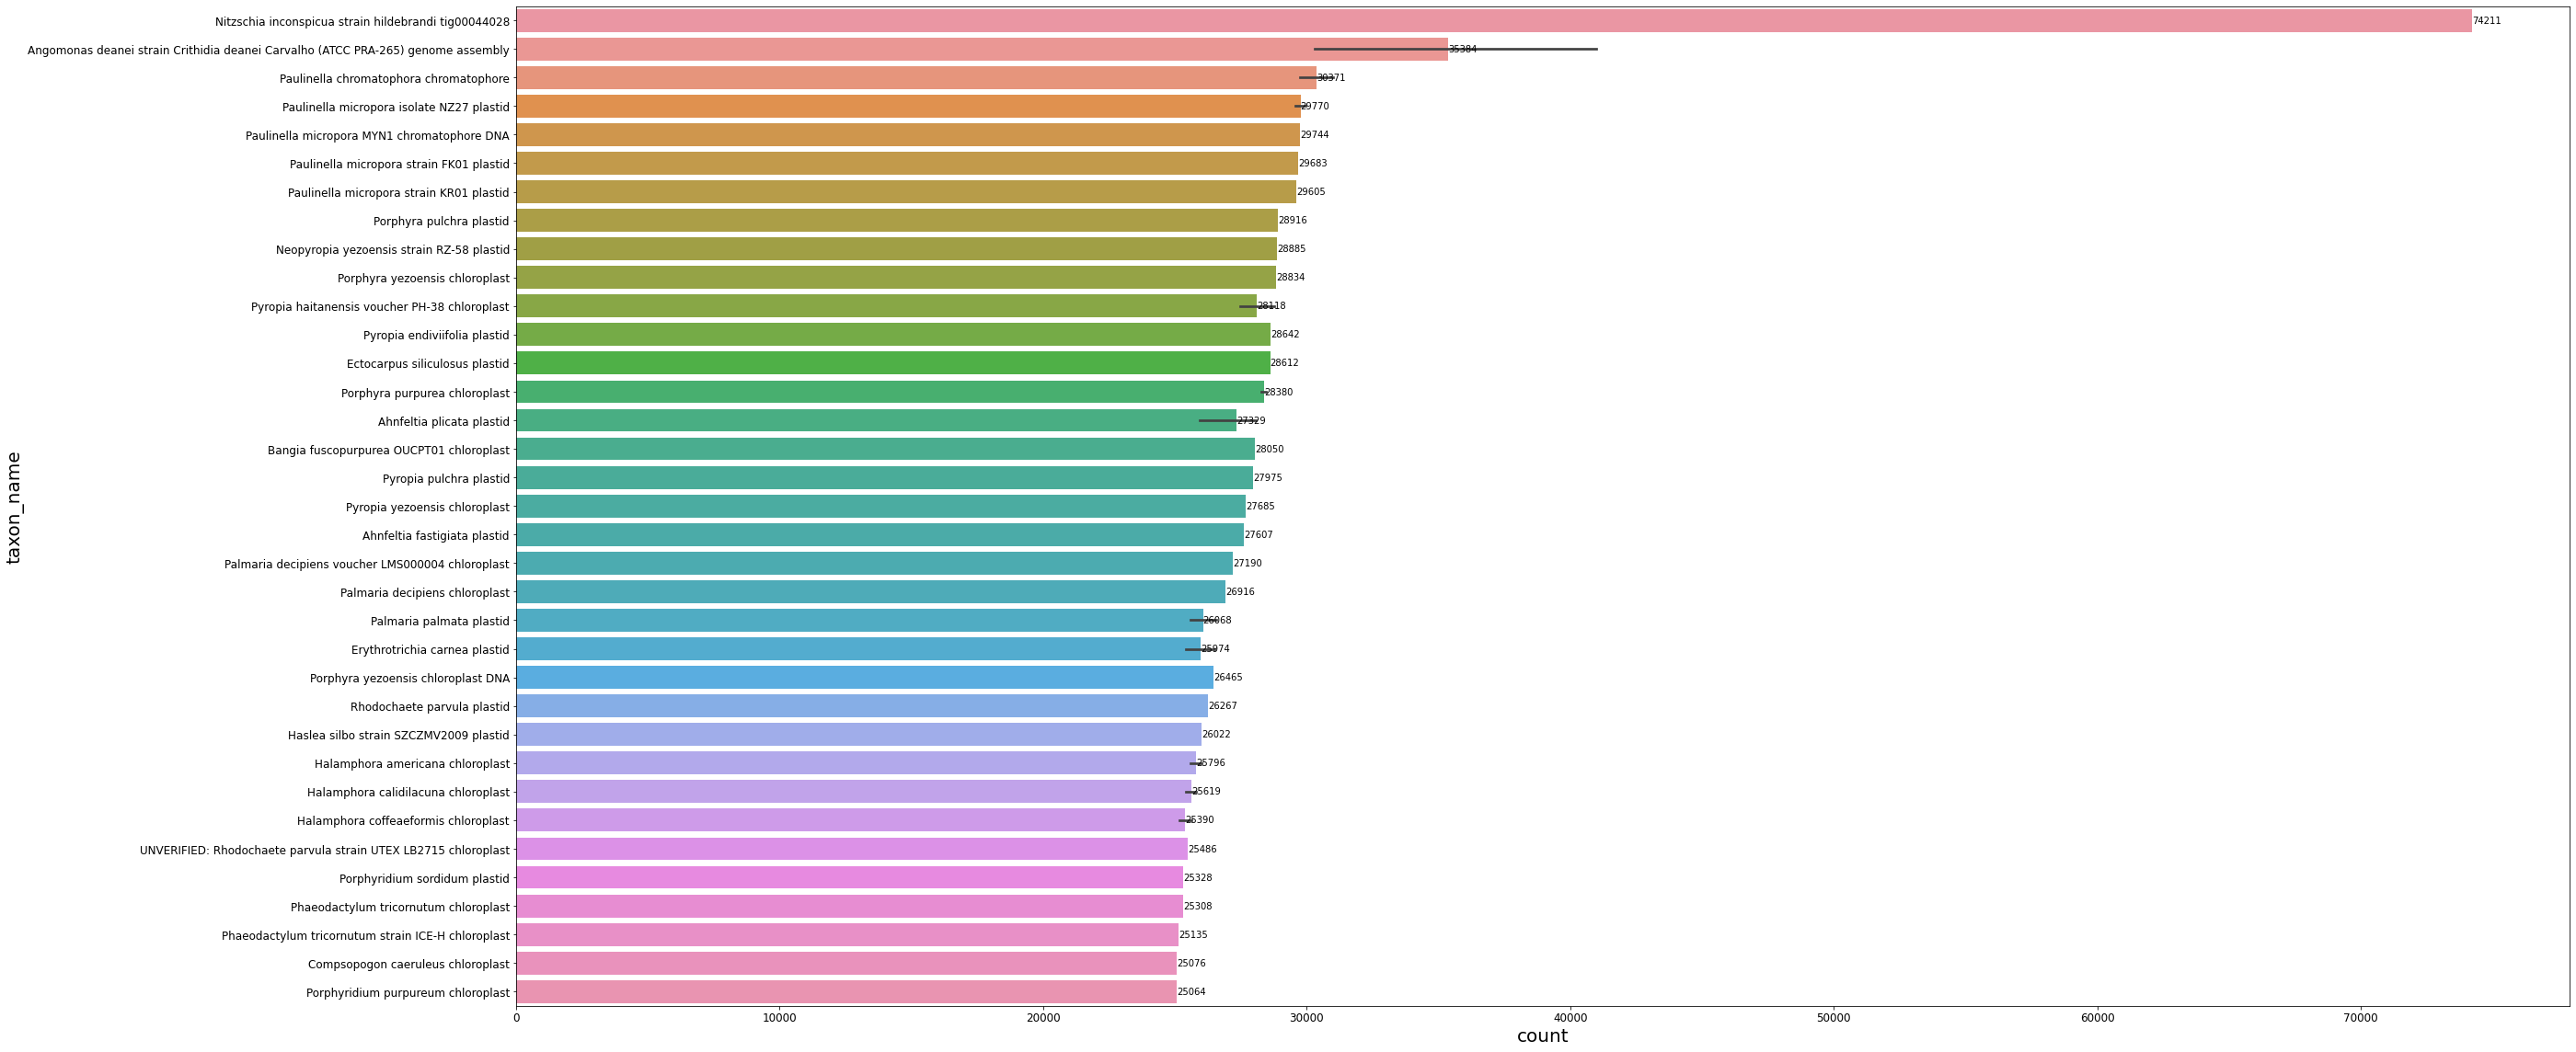

In [47]:
plt.figure(figsize = (40,20))
ax = sns.barplot(y='taxon_name', x='count', data=df[df['count'] >= 25000])
ax.set_xlabel("count",fontsize=20)
ax.set_ylabel("taxon_name",fontsize=20)
ax.tick_params(axis='x', labelsize = 12)
ax.tick_params(axis='y', labelsize = 12)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center')
    
plt.savefig('03_July142020.jpeg', dpi=700)

In [ ]:
# Create a new column describing how long the alignment is on the query sequence
qaln_length = abs(results['query_end'] - results['query_start']) + 1
print(qaln_length)

In [ ]:
# Add qaln_length to the results table as a new column
results['qaln_length'] = qaln_length
results.head()

In [ ]:
# Create a scatterplot
results.plot.scatter('pc_identity', 'e_value')
plt.title("E value vs %identity");              # add a title to the plot

In [ ]:
# SOLUTION - EXERCISE 01
# !! Do not execute this cell if skipping computational step !!

# We can reuse the directories and db, but need to define new input/output filenames
query = os.path.join(datadir, 'lantibiotic.fasta')                                   # query sequence(s)
blastout = os.path.join(outdir, 'lantibiotic_blastx_kitasatospora.tab')              # BLAST output

# Create command-line for BLASTX
cmd_blastx = NcbiblastxCommandline(query=query, out=blastout, outfmt=6, db=db)

# Run BLASTX, and catch STDOUT/STDERR
stdout, stderr = cmd_blastx()

# Check STDOUT, STDERR
print("STDOUT: %s" % stdout)
print("STDERR: %s" % stderr)

In [ ]:
# !! Uncomment the line below, if skipping computational step !!
# blastout = os.path.join('prepped', 'kitasatospora', 'lantibiotic_blastx_kitasatospora.tab')

# Read BLASTX output, and reuse the column headers defined earlier
results = pd.read_csv(blastout, sep="\t", header=None)
results.columns = headers

# Create a scatterplot
results.plot.scatter('bitscore', 'pc_identity')
plt.title("%identity vs bitscore");  